In [41]:
# Loading the dataset

!mkdir -p ~/ /root/.kaggle

!mv kaggle.json ~/ /root/.kaggle/

!chmod 600 ~/ /root/.kaggle/kaggle.json




mv: cannot stat 'kaggle.json': No such file or directory
mv: cannot move '/root/' to a subdirectory of itself, '/root/.kaggle/root'


In [12]:
!kaggle datasets list

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000          11874        208  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                              467020  2025-03-13 03:12:30.423000           4186         67  1.0              
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                                   20314  2025-02-18 06:50:24.370000          17519        293  1.0     

In [13]:
!kaggle datasets download -d puneet6060/intel-image-classification -p /content


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors


In [14]:
!unzip /content/intel-image-classification.zip -d /content/intel-image-classification

Streaming output truncated to the last 5000 lines.
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7506.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7537.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7539.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7551.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7560.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7565.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7578.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7581.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7586.jpg  
  inflating: /content/intel-image-classification/seg_train/seg_train/mountain/7647.jpg  
  inflating: /content/intel-image-classification/seg_train/

In [32]:
# importing necessary liabraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
To check normalization:  [[[0.70003587 0.77084595 0.8350461 ]
  [0.69055474 0.75937533 0.82224923]
  [0.7119189  0.77875006 0.8402977 ]
  ...
  [0.3196243  0.24656504 0.23813468]
  [0.32949507 0.25662765 0.24751419]
  [0.33028415 0.25976077 0.24282941]]

 [[0.6165034  0.67582744 0.7271245 ]
  [0.60907644 0.6650847  0.70908713]
  [0.63874817 0.6914407  0.7281486 ]
  ...
  [0.34000465 0.25278693 0.25034645]
  [0.31190324 0.23209827 0.22133876]
  [0.3066585  0.23488155 0.21320145]]

 [[0.56686926 0.60987127 0.62515193]
  [0.57747954 0.6198185  0.6331097 ]
  [0.59159607 0.6332719  0.6445736 ]
  ...
  [0.3239499  0.22652705 0.22514412]
  [0.32168508 0.23421952 0.22128685]
  [0.31316194 0.24006927 0.21566781]]

 ...

 [[0.8088841  0.6480998  0.436335  ]
  [0.80822086 0.64743656 0.43567184]
  [0.8184042  0.65761983 0.44528425]
  ...
  [0.33142725 0.34999666 0.25451487]
  [0.48439115 0.5233557  0.39048275]
  [

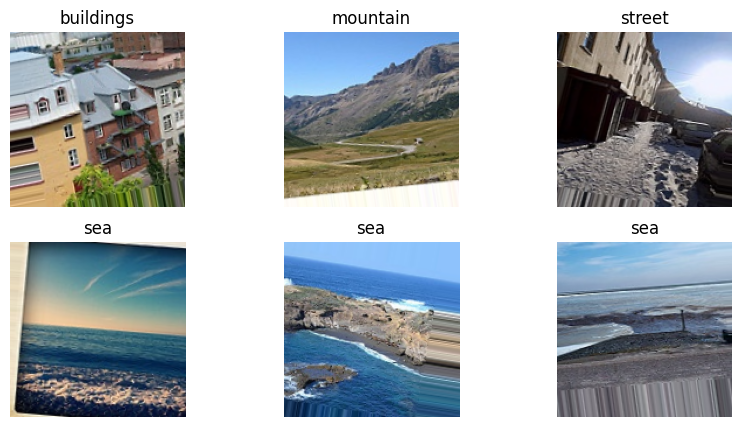

In [15]:
# Define paths
train_dir = "/content/intel-image-classification/seg_train/seg_train"
test_dir = "/content/intel-image-classification/seg_test/seg_test"
pred_dir = "/content/intel-image-classification/seg_pred/sed_pred"
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Display sample images
class_names = list(train_data.class_indices.keys())
images, labels = next(train_data)

print('To check normalization: ',images[0])

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis("off")
plt.show()


In [12]:
# Model Building

# Defining image dimensions and number of classes
IMG_HEIGHT, IMG_WIDTH = 150, 150
NUM_CLASSES = len(train_data.class_indices)  # Automatically detects number of classes

# Building CNN Model
model = Sequential([
    # Input Layer & First Convolutional Block
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolutio nal Block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Dropout Layer to prevent overfitting
    Dropout(0.25),

    # Flatten layer to convert 2D features into 1D
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),

    # Dropout Layer
    Dropout(0.5),

    # Output Layer (Softmax for multi-class classification)
    Dense(NUM_CLASSES, activation='softmax')
])

# Compiling the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Printing Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,637,126 (40.58 MB)

 Trainable params: 10,637,126 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.4744 - loss: 1.3932 - val_accuracy: 0.6550 - val_loss: 0.9239
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 194ms/step - accuracy: 0.6141 - loss: 1.0132 - val_accuracy: 0.7320 - val_loss: 0.7413
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 193ms/step - accuracy: 0.6643 - loss: 0.9129 - val_accuracy: 0.7507 - val_loss: 0.7313
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.6893 - loss: 0.8303 - val_accuracy: 0.7833 - val_loss: 0.6263
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 195ms/step - accuracy: 0.7228 - loss: 0.7709 - val_accuracy: 0.7893 - val_loss: 0.5867
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - accuracy: 0.7165 - loss: 0.7730 - val_accuracy: 0.7700 - val_loss: 0.6589
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 86s 196ms/step - accuracy: 0.7369 - loss: 0.7302 - val_accuracy: 0.7917 - val_loss: 0.6034
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 203ms/step - accuracy: 0.7467 - loss: 0

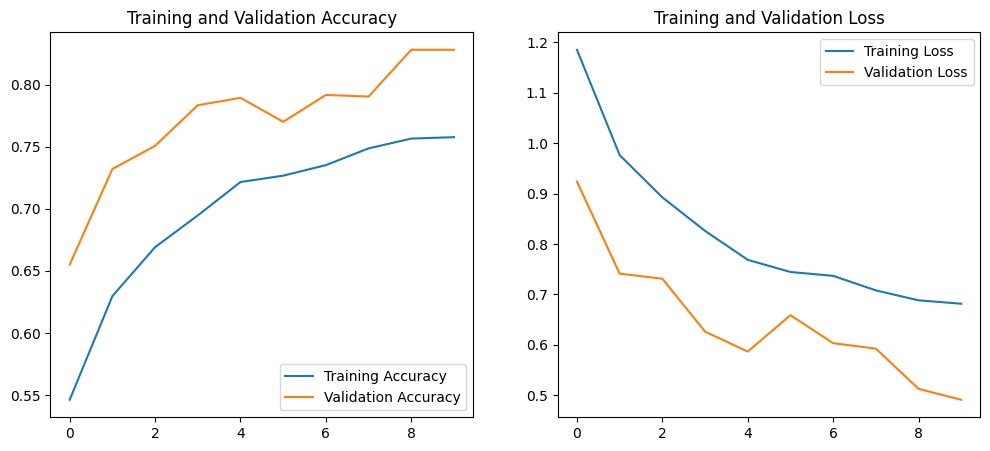

In [13]:
# Train the model

EPOCHS = 10
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS,
    batch_size=32
)

# Plot accuracy and loss graphs
def plot_training_history(history):
    # Extract training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Training Accuracy")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Training Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")

    plt.show()

# Call the function to plot graphs
plot_training_history(history)


In [15]:
# Save the model
model.save('my_model.h5')

In [3]:
# Loading the model
model = load_model('my_model.h5')

# Verify the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,637,128 (40.58 MB)

 Trainable params: 10,637,126 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [16]:
# Evaluating the model on test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8191 - loss: 0.4978
Test Accuracy: 0.8280, Test Loss: 0.4910


In [19]:
# Making predictions on test set

# Getting predicted probabilities
y_pred_probs = model.predict(test_data)

# Converting probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


array([5, 1, 1, ..., 5, 2, 1])

In [21]:
# calculating precision, recall,f1-score

# Getting true labels from test dataset
y_true = test_data.classes

# Printing classification report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.15      0.18      0.17       437
           1       0.15      0.16      0.16       474
           2       0.19      0.18      0.18       553
           3       0.19      0.18      0.19       525
           4       0.17      0.17      0.17       510
           5       0.18      0.15      0.16       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



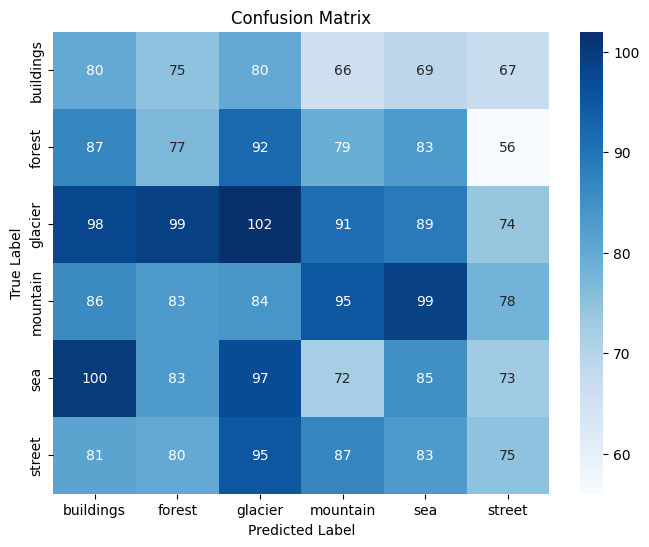

In [23]:
# Confusion Matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
# Task 3: Visualization

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


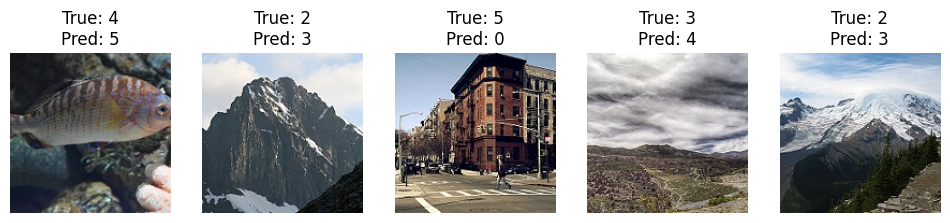

In [30]:
# Displaying few misclassified images

# Extract true labels and images from DirectoryIterator
X_test, y_true = [], []

# Reset iterator to avoid skipping samples
test_data.reset()

# Loop through the dataset and collect images & labels
for i in range(len(test_data)):
    img, label = test_data.__getitem__(i)  # Fetch batch
    X_test.append(img[0])  # Extract the first image from batch
    y_true.append(np.argmax(label[0]))  # Converting one-hot to class index

X_test = np.array(X_test)
y_true = np.array(y_true)

# model predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Find misclassified images
misclassified_idx = np.where(y_pred != y_true)[0]

# Display misclassified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:5]):  # Show first 5 misclassified images
    image = X_test[idx]

    # Rescale if pixel values are normalized
    if image.max() <= 1:
        image = (image * 255).astype("uint8")

    true_label = y_true[idx]
    predicted_label = y_pred[idx]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image)  # Display properly scaled image
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.show()


In [40]:
"""
The model achieved a validation accuracy of 82.8% and a test accuracy of 82.8%, with a test loss of 0.4910.This indicates that the model
performs well but still has room for improvement. The confusion matrix highlights that some classes are frequently misclassified, which may
be due to overlapping features between categories or imbalanced class distributions.

The feature maps from the first convolutional layer show that the model effectively captures edges and textures, which is expected in a
convolutional neural network (CNN). However, despite the decent accuracy, the classification report shows low precision, recall, and F1-scores
across all classes, suggesting inconsistencies in the model's performance.

Areas for Improvement
Class Imbalance: If some categories have fewer samples than others, the model may struggle to learn their features properly. Techniques such
as oversampling the minority class, using data augmentation, or adjusting class weights during training can help balance the dataset.

Data Quality: Misclassifications may be due to poor-quality images, incorrect labels, or insufficient feature differences between classes.
Cleaning the dataset and ensuring accurate labeling can improve performance.

Feature Extraction: The model may not be learning deep enough representations. Using a deeper network, fine-tuning a pre-trained model, or
applying advanced feature extraction techniques can enhance its ability to distinguish between classes.

Hyperparameter Tuning: Adjusting learning rates, batch sizes, dropout rates, and regularization techniques can improve the model’s
generalization and prevent overfitting.

Increasing Training Data: A larger and more diverse dataset can help the model learn better and improve accuracy, especially for
underrepresented classes. If collecting more real data is difficult, synthetic data generation or data augmentation can be useful alternatives.

By implementing these improvements, the model's performance can be enhanced, leading to better classification accuracy and more
reliable predictions.
"""

"\nThe model achieved a validation accuracy of 82.8% and a test accuracy of 82.8%, with a test loss of 0.4910.This indicates that the model\nperforms well but still has room for improvement. The confusion matrix highlights that some classes are frequently misclassified, which may \nbe due to overlapping features between categories or imbalanced class distributions.\n\nThe feature maps from the first convolutional layer show that the model effectively captures edges and textures, which is expected in a \nconvolutional neural network (CNN). However, despite the decent accuracy, the classification report shows low precision, recall, and F1-scores\nacross all classes, suggesting inconsistencies in the model's performance.\n\nAreas for Improvement\nClass Imbalance: If some categories have fewer samples than others, the model may struggle to learn their features properly. Techniques such \nas oversampling the minority class, using data augmentation, or adjusting class weights during training